In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Activation,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\amuda\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
X_train=np.loadtxt('input.csv',delimiter =',')
Y_train=np.loadtxt('labels.csv',delimiter =',')

X_test=np.loadtxt('input_test.csv',delimiter =',')
Y_test=np.loadtxt('labels_test.csv',delimiter =',')


In [3]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

In [4]:
print("shape of X_train:",X_train.shape)
print("shape of Y_train:",Y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of Y_test:",Y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


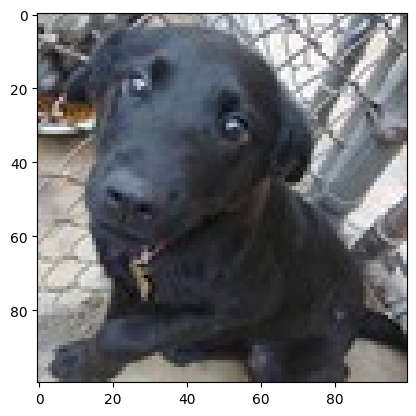

In [5]:
idx =random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [6]:
from tensorflow.keras.layers import MaxPooling2D

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\amuda\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation ='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)
X_train=X_train/255.0
X_test=X_test/255.0

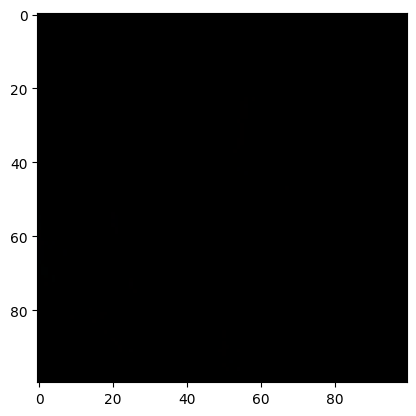

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
the image is dog


In [9]:
idx2 = random.randint(0,len(X_test))
plt.imshow(X_test[idx2,:])
plt.show()
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    print("the image is dog")
else:
    print("the image is cat")    